In [1]:
from matplotlib import pyplot as plt
import numpy as np
from skimage.filters import threshold_multiotsu
import cv2

In [6]:
img = cv2.imread("BSE.tif", 0)

if image has noise then execute below cell for better result

In [ ]:
#Denoise for better results
#from skimage.restoration import denoise_tv_chambolle
#denoised_img = denoise_tv_chambolle(img, weight=0.1, eps=0.0002, n_iter_max=200, multichannel=False)

outherwise don't execute the upper cell & carry on with the programme

(array([ 1503.,  4537.,  3200.,  4608.,  5865.,  7691.,  9625., 25963.,
            0., 33377., 18666., 19131., 36722.,     0., 31707., 13031.,
        10769.,  8827.,  6923.,  5264.,  7160.,  2595.,  1889.,  1722.,
         1539.,  3244.,     0.,  4418.,  3113.,  4053., 11409.,     0.,
        16772., 10292., 10680., 11360., 11665., 11160., 19404.,     0.,
        14149.,  5101.,  3961.,  4908.,     0.,  2600.,   669.,   518.,
          354.,   477.,   172.,   160.,   114.,   126.,   255.,     0.,
          267.,   142.,   134.,    87.,   123.,   204.,    84.,   122.,
           98.,   104.,   107.,   206.,     0.,   207.,   108.,   116.,
          256.,     0.,   244.,   137.,   140.,   138.,   166.,   170.,
          383.,   237.,   316.,   343.,   477.,  1422.,     0.,  2259.,
         1469.,  1623.,  3926.,     0.,  4171.,  1900.,  1763.,  1432.,
         1093.,   809.,  1017.,   603.]),
 array([100.  , 101.55, 103.1 , 104.65, 106.2 , 107.75, 109.3 , 110.85,
        112.4 , 113.95

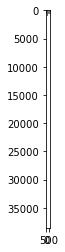

In [9]:
plt.imshow(img, cmap='gray')
plt.hist(img.flat, bins=100, range=(100,255))

In [11]:
thresholds = threshold_multiotsu(img, classes=4)

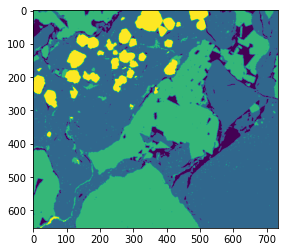

In [12]:
regions = np.digitize(img, bins=thresholds)
plt.imshow(regions)

segm1 = (regions == 0)
segm2 = (regions == 1)
segm3 = (regions == 2)
segm4 = (regions == 3)

For Binary Opening and Closing
Opening takes care of Isolated pixels in the window
Closing takes care of Holes in the window 

In [13]:
from scipy import ndimage as nd

In [14]:
segm1_opened = nd.binary_opening(segm1, np.ones((3,3)))
segm1_closed = nd.binary_closing(segm1_opened, np.ones((3,3)))

segm2_opened = nd.binary_opening(segm2, np.ones((3,3)))
segm2_closed = nd.binary_closing(segm2_opened, np.ones((3,3)))

segm3_opened = nd.binary_opening(segm3, np.ones((3,3)))
segm3_closed = nd.binary_closing(segm3_opened, np.ones((3,3)))

segm4_opened = nd.binary_opening(segm4, np.ones((3,3)))
segm4_closed = nd.binary_closing(segm4_opened, np.ones((3,3)))

In [15]:
all_segments_cleaned = np.zeros((img.shape[0], img.shape[1], 3))

In [16]:
all_segments_cleaned[segm1_closed] = (1,0,0)
all_segments_cleaned[segm2_closed] = (0,1,0)
all_segments_cleaned[segm3_closed] = (0,0,1)
all_segments_cleaned[segm4_closed] = (1,1,0)

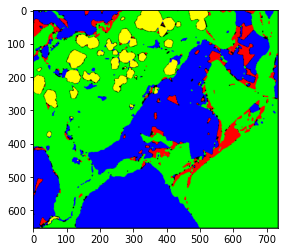

In [18]:
plt.imshow(all_segments_cleaned)
plt.imsave("BSE_segmented.jpg", all_segments_cleaned)